In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import os
from os import path
import math
import re
import random

In [2]:
!apt-get install zip




zip is already the newest version (3.0-11build1).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


In [3]:
if path.exists('/kaggle/working/output/')==False:
    os.mkdir('/kaggle/working/output/')

In [4]:
output_folder = '/kaggle/working/output/'

In [5]:
def gaussian_noise(image):
    noise = np.zeros((image.shape[0], image.shape[1]),dtype=np.uint8)
    cv.randn(noise, 128, 20)
    noise = (noise*random.uniform(0, 0.1)).astype(np.uint8)
    return noise

In [6]:
def uniform_noise(image):
    noise = np.zeros((image.shape[0], image.shape[1]),dtype=np.uint8)
    cv.randu(noise,0,255)
    noise = (noise*random.uniform(0, 0.1)).astype(np.uint8)
    return noise

In [7]:
def impulse_noise(image):
    noise = np.zeros((image.shape[0], image.shape[1]),dtype=np.uint8)
    ret,noise = cv.threshold(noise,250,255,cv.THRESH_BINARY)
    noise = (noise*random.uniform(0, 0.1)).astype(np.uint8)
    return noise

In [8]:
def darkener(img):
    row,col = img.shape
    r = 0
    while r<row:
        c = 0
        while c<col:
            if img[r][c]<175:
                img[r][c]=50
            c+=1
        r+=1
    return img

In [9]:
def darkener2(img):
    row,col = img.shape
    r = 0
    while r<row:
        c = 0
        while c<col:
            if img[r][c]<200:
                img[r][c]=50
            c+=1
        r+=1
    return img

In [10]:
def darkener3(img):
    row,col = img.shape
    r = 0
    while r<row:
        c = 0
        while c<col:
            if img[r][c]<190:
                img[r][c]=50
            c+=1
        r+=1
    return img

In [11]:
def add_noise(img):
  
    # Getting the dimensions of the image
    row , col = img.shape
      
    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 3 and 10
    number_of_pixels = random.randint(3, 10)
    for i in range(number_of_pixels):
        
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
          
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
          
        # Colour that pixel to white
        img[y_coord][x_coord] = 205
        
    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 3 and 10
    number_of_pixels = random.randint(3 , 10)
    for i in range(number_of_pixels):
        
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
          
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
          
        # Colour that pixel to black
        img[y_coord][x_coord] = 50
                
    img = img.astype(np.uint8)
    img = cv.merge((img,img,img))
    return img

In [12]:
train_df = pd.read_csv('../input/emnist/emnist-byclass-train.csv', header=None)

In [13]:
X_train = train_df.loc[:, 1:]
y_train = train_df.loc[:, 0]

In [14]:
label_map = pd.read_csv("../input/emnist/emnist-byclass-mapping.txt", 
                        delimiter = ' ', 
                        index_col=0, 
                        header=None, 
                        squeeze=True)

In [15]:
label_dictionary = {}
for index, label in enumerate(label_map):
    label_dictionary[index] = chr(label)

In [16]:
def reshape_and_rotate(image):
    W = 28
    H = 28
    image = image.reshape(W, H)
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

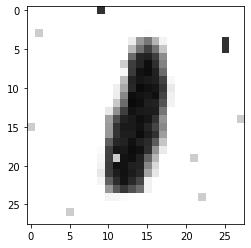

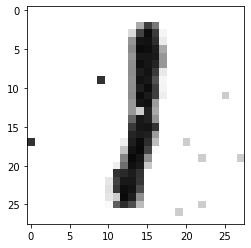

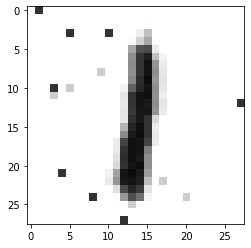

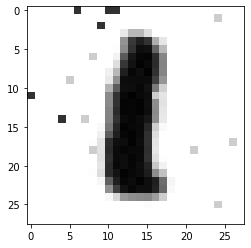

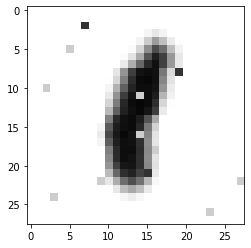

In [17]:
# Capital 1s
i=0
n=0
while i<len(y_train):
    inc = random.randint(1, 5)
    if y_train[i]==18:
        n+=1
        img = reshape_and_rotate(X_train.iloc[i].values).astype('uint8')
        img = cv.bitwise_not(img)
        noisy_image1 = cv.add(img,gaussian_noise(img))
        noisy_image2 = cv.add(noisy_image1,uniform_noise(img))
        noisy_image3 = cv.add(noisy_image2,impulse_noise(img))
        noisy = add_noise(noisy_image3)
        cv.imwrite(os.path.join(output_folder, f'1_cap_{str(n)}.png'), noisy,  [cv.IMWRITE_PNG_COMPRESSION, 9])
        if n<6:
            plt.imshow(noisy)
            plt.show()
    if n==500:break
    i+=inc

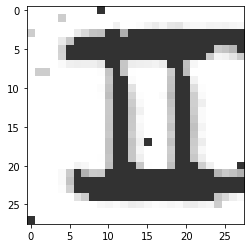

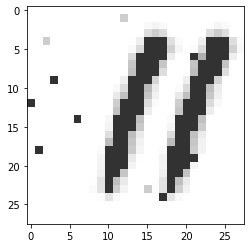

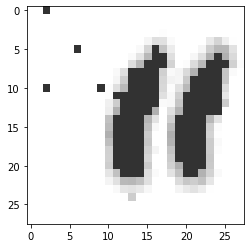

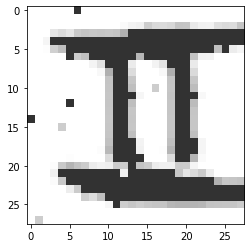

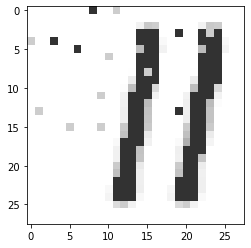

In [18]:
# Making capital 2s
i=0
n=0
while i<len(y_train):
    inc = random.randint(1, 5)
    if y_train[i]==18:
        n+=1
        img = reshape_and_rotate(X_train.iloc[i].values).astype('uint8')
        img = cv.bitwise_not(img)
        rows,cols = img.shape[:2]
        M = np.float32([[1,0,8],[0,1,0]])
        dst = cv.warpAffine(img,M,(cols,rows))
        dst2 = cv.rectangle(dst, (0,0), (12,28), (255), -1)
        dst3 = cv.addWeighted(img, 0.5, dst2, 0.5, 0.0)
        mask=cv.inRange(dst3,(0),(13))
        dst3[mask>0]=(0)
        noisy_image1 = cv.add(dst3,gaussian_noise(img))
        noisy_image2 = cv.add(noisy_image1,uniform_noise(img))
        noisy_image3 = cv.add(noisy_image2,impulse_noise(img))
        dark_image = darkener(noisy_image3)
        noisy = add_noise(dark_image)
        cv.imwrite(os.path.join(output_folder, f'2_cap_{str(n)}.png'), noisy,  [cv.IMWRITE_PNG_COMPRESSION, 9])
        if n<6:
            plt.imshow(noisy)
            plt.show()
    if n==500:break
    i+=inc


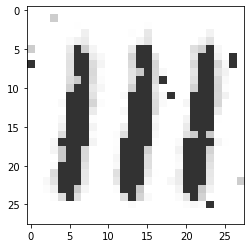

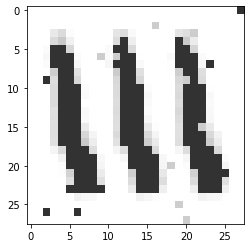

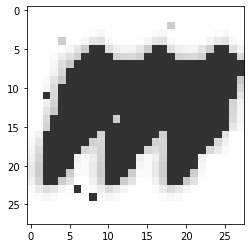

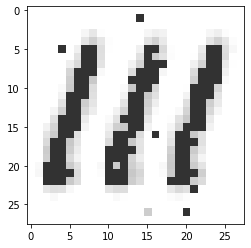

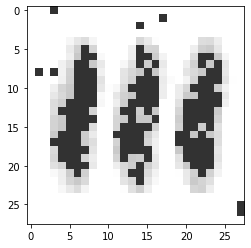

In [19]:
# Making capital 3s
i=0
n=0
while i<len(y_train):
    inc = random.randint(1, 5)
    if y_train[i]==18:
        n+=1
        img = reshape_and_rotate(X_train.iloc[i].values).astype('uint8')
        img = cv.bitwise_not(img)
        rows,cols = img.shape[:2]
        M = np.float32([[1,0,8],[0,1,0]])
        M_M = np.float32([[1,0,-8],[0,1,0]])
        dst = cv.warpAffine(img,M,(cols,rows))
        dst_dst = cv.warpAffine(img,M_M,(cols,rows))
        dst2 = cv.rectangle(dst, (0,0), (12,28), (255), -1)
        dst_dst2 = cv.rectangle(dst_dst, (20,0), (28,28), (255), -1)  
        dst3 = cv.addWeighted(img, 0.5, dst2, 0.5, 0.0)
        dst_dst3 = cv.addWeighted(dst3, 0.67, dst_dst2, 0.33, 0.0)
        noisy_image1 = cv.add(dst_dst3,gaussian_noise(img))
        noisy_image2 = cv.add(noisy_image1,uniform_noise(img))
        noisy_image3 = cv.add(noisy_image2,impulse_noise(img))
        dark_image = darkener2(noisy_image3)
        noisy = add_noise(dark_image)
        cv.imwrite(os.path.join(output_folder, f'3_cap_{str(n)}.png'), noisy,  [cv.IMWRITE_PNG_COMPRESSION, 9])
        if n<6:
            plt.imshow(noisy)
            plt.show()
    if n==500:break
    i+=inc


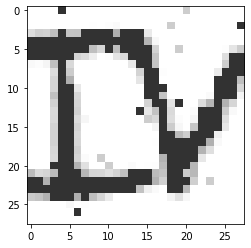

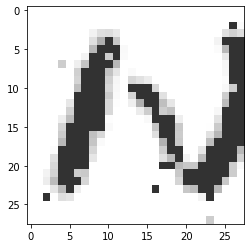

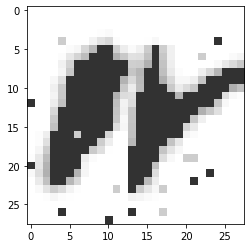

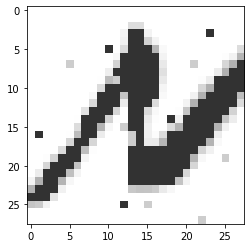

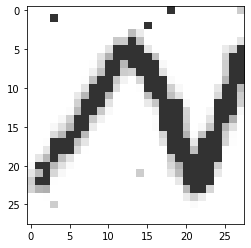

In [20]:
# Making capital 4s
i=0
j=0
n=0
while i<len(y_train):
    inc = random.randint(1, 5)
    if y_train[i]==18:
        n+=1
        img1 = reshape_and_rotate(X_train.iloc[i].values).astype('uint8')
        img1 = cv.bitwise_not(img1)
        rows,cols = img1.shape[:2]
        M = np.float32([[1,0,7],[0,1,0]])
        M_M = np.float32([[1,0,-7],[0,1,0]])
        while j<len(y_train):
            if y_train[j]==31:
                img2 = reshape_and_rotate(X_train.iloc[j].values).astype('uint8')
                img2 = cv.bitwise_not(img2)
                j+=inc
                break
            j+=inc

        dst = cv.warpAffine(img1,M_M,(cols,rows))
        dst_dst = cv.warpAffine(img2,M,(cols,rows))
        dst2 = cv.rectangle(dst_dst, (0,0), (12,28), (255), -1)
        dst_dst2 = cv.rectangle(dst, (20,0), (28,28), (255), -1)  
        dst3 = cv.addWeighted(dst_dst2, 0.5, dst2, 0.5, 0.0)        
        mask=cv.inRange(dst3,(0),(13))
        dst3[mask>0]=(0)
        noisy_image1 = cv.add(dst3,gaussian_noise(img1))
        noisy_image2 = cv.add(noisy_image1,uniform_noise(img1))
        noisy_image3 = cv.add(noisy_image2,impulse_noise(img1))
        dark_image = darkener(noisy_image3)
        noisy = add_noise(dark_image)
        cv.imwrite(os.path.join(output_folder, f'4_cap_{str(n)}.png'), noisy,  [cv.IMWRITE_PNG_COMPRESSION, 9])
        if n<6:
            plt.imshow(noisy)
            plt.show()
    if n==200:break
    i+=inc


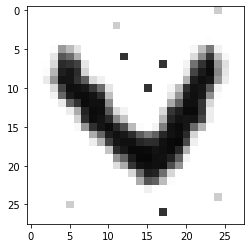

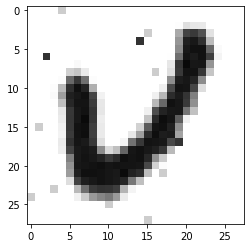

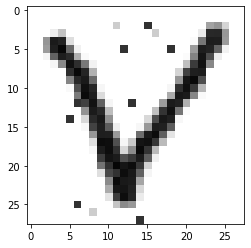

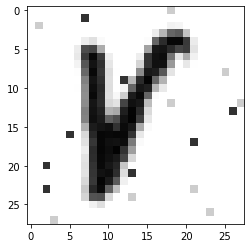

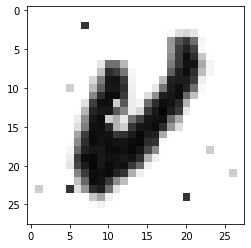

In [21]:
# Capital 5s
i=0
n=0
while i<len(y_train):
    inc = random.randint(1, 5)
    if y_train[i]==31:
        n+=1
        img = reshape_and_rotate(X_train.iloc[i].values).astype('uint8')
        img = cv.bitwise_not(img)
        noisy_image1 = cv.add(img,gaussian_noise(img))
        noisy_image2 = cv.add(noisy_image1,uniform_noise(img))
        noisy_image3 = cv.add(noisy_image2,impulse_noise(img))
        noisy = add_noise(noisy_image3)
        cv.imwrite(os.path.join(output_folder, f'5_cap_{str(n)}.png'), noisy,  [cv.IMWRITE_PNG_COMPRESSION, 9])
        if n<6:
            plt.imshow(noisy)
            plt.show()
    if n==500:break
    i+=inc

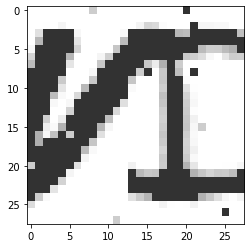

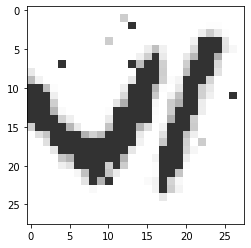

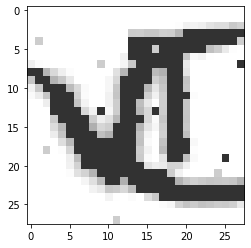

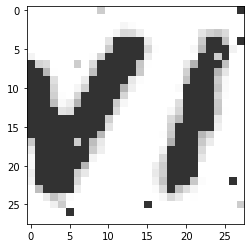

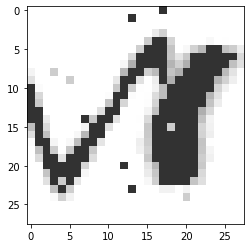

In [22]:
# Making capital 6s
i=0
j=0
n=0
while i<len(y_train):
    inc = random.randint(1, 5)
    if y_train[i]==31:
        n+=1
        img1 = reshape_and_rotate(X_train.iloc[i].values).astype('uint8')
        img1 = cv.bitwise_not(img1)
        rows,cols = img1.shape[:2]
        M = np.float32([[1,0,7],[0,1,0]])
        M_M = np.float32([[1,0,-7],[0,1,0]])
        while j<len(y_train):
            if y_train[j]==18:
                img2 = reshape_and_rotate(X_train.iloc[j].values).astype('uint8')
                img2 = cv.bitwise_not(img2)
                j+=inc
                break
            j+=inc

        dst = cv.warpAffine(img1,M_M,(cols,rows))
        dst_dst = cv.warpAffine(img2,M,(cols,rows))
        dst2 = cv.rectangle(dst_dst, (0,0), (12,28), (255), -1)
        dst_dst2 = cv.rectangle(dst, (20,0), (28,28), (255), -1)  
        dst3 = cv.addWeighted(dst_dst2, 0.5, dst2, 0.5, 0.0)        
        mask=cv.inRange(dst3,(0),(13))
        dst3[mask>0]=(0)
        noisy_image1 = cv.add(dst3,gaussian_noise(img1))
        noisy_image2 = cv.add(noisy_image1,uniform_noise(img1))
        noisy_image3 = cv.add(noisy_image2,impulse_noise(img1))
        dark_image = darkener(noisy_image3)
        noisy = add_noise(dark_image)
        cv.imwrite(os.path.join(output_folder, f'6_cap_{str(n)}.png'), noisy,  [cv.IMWRITE_PNG_COMPRESSION, 9])
        if n<6:
            plt.imshow(noisy)
            plt.show()
    if n==500:break
    i+=inc


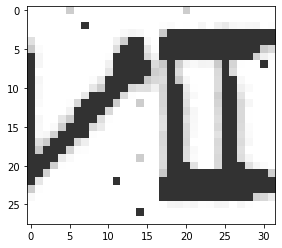

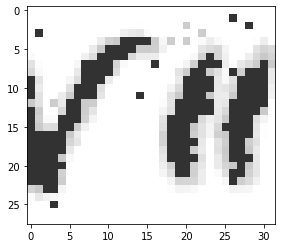

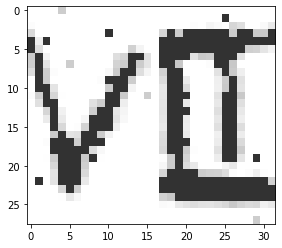

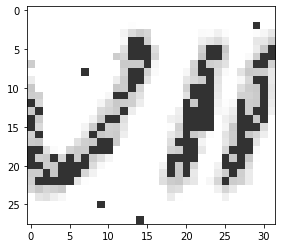

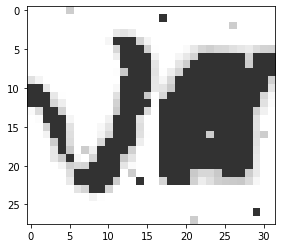

In [23]:
# Making capital 7s
i=0
j=0
n=0
while i<len(y_train):
    inc = random.randint(1, 5)
    if y_train[i]==31:
        n+=1
        img1 = reshape_and_rotate(X_train.iloc[i].values).astype('uint8')
        img1 = cv.bitwise_not(img1)
        rows,cols = img1.shape[:2]
        exp = cols+4
        M = np.float32([[1,0,7],[0,1,0]])
        M_M = np.float32([[1,0,-7],[0,1,0]])
        M_M_M = np.float32([[1,0,14],[0,1,0]])
        while j<len(y_train):
            if y_train[j]==18:
                img2 = reshape_and_rotate(X_train.iloc[j].values).astype('uint8')
                img2 = cv.bitwise_not(img2)
                img3 = reshape_and_rotate(X_train.iloc[j].values).astype('uint8')
                img3 = cv.bitwise_not(img3)
                j+=inc
                break
            j+=inc

        dst = cv.warpAffine(img1,M_M,(exp,rows))
        dst_dst = cv.warpAffine(img2,M,(exp,rows))
        dst_dst_dst = cv.warpAffine(img3,M_M_M,(exp,rows))
        dst2 = cv.rectangle(dst_dst, (0,0), (16,32), (255), -1)
        dst_dst2 = cv.rectangle(dst, (20,0), (32,32), (255), -1)  
        dst_dst_dst2 = cv.rectangle(dst_dst_dst, (0,0), (16,32), (255), -1)  
        dst3 = cv.addWeighted(dst_dst2, 0.5, dst2, 0.5, 0.0)      
        mask=cv.inRange(dst3,(0),(13))
        dst3[mask>0]=(0)
        dst4 = cv.addWeighted(dst_dst_dst2, 0.33, dst3, 0.67, 0.0)      
        mask=cv.inRange(dst4,(0),(13))
        dst4[mask>0]=(0)
        noisy_image1 = cv.add(dst4,gaussian_noise(dst4))
        noisy_image2 = cv.add(noisy_image1,uniform_noise(dst4))
        noisy_image3 = cv.add(noisy_image2,impulse_noise(dst4))
        dark_image = darkener2(noisy_image3)
        noisy = add_noise(dark_image)
        cv.imwrite(os.path.join(output_folder, f'7_cap_{str(n)}.png'), noisy,  [cv.IMWRITE_PNG_COMPRESSION, 9])
        if n<6:
            plt.imshow(noisy)
            plt.show()
    if n==500:break
    i+=inc


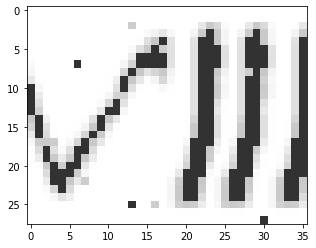

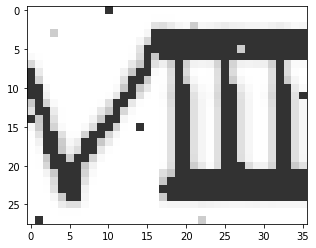

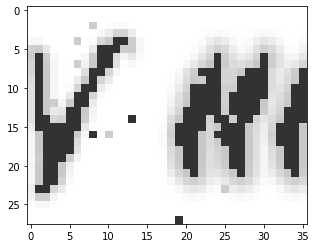

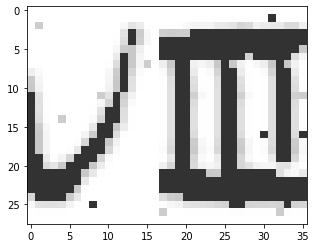

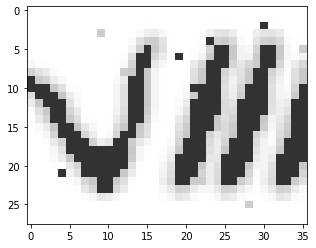

In [24]:
# Making capital 8s
i=0
j=0
n=0
while i<len(y_train):
    inc = random.randint(1, 5)
    if y_train[i]==31:
        n+=1
        img1 = reshape_and_rotate(X_train.iloc[i].values).astype('uint8')
        img1 = cv.bitwise_not(img1)
        rows,cols = img1.shape[:2]
        exp = cols+8
        M = np.float32([[1,0,8],[0,1,0]])
        M_M = np.float32([[1,0,-7],[0,1,0]])
        M_M_M = np.float32([[1,0,14],[0,1,0]])
        M_4 = np.float32([[1,0,21],[0,1,0]])
        while j<len(y_train):
            if y_train[j]==18:
                img2 = reshape_and_rotate(X_train.iloc[j].values).astype('uint8')
                img2 = cv.bitwise_not(img2)
                img3 = reshape_and_rotate(X_train.iloc[j].values).astype('uint8')
                img3 = cv.bitwise_not(img3)
                img4 = reshape_and_rotate(X_train.iloc[j].values).astype('uint8')
                img4 = cv.bitwise_not(img4)
                j+=inc
                break
            j+=inc

        dst = cv.warpAffine(img1,M_M,(exp,rows))
        dst_dst = cv.warpAffine(img2,M,(exp,rows))
        dst_dst_dst = cv.warpAffine(img3,M_M_M,(exp,rows))
        dst_sqrd = cv.warpAffine(img3,M_4,(exp,rows))
        dst2 = cv.rectangle(dst_dst, (0,0), (16,36), (255), -1)
        dst_dst2 = cv.rectangle(dst, (20,0), (36,36), (255), -1)  
        dst_dst_dst2 = cv.rectangle(dst_dst_dst, (0,0), (16,36), (255), -1)  
        dst_sqrd_2 = cv.rectangle(dst_sqrd, (20,0), (0,36), (255), -1)  
        dst3 = cv.addWeighted(dst_dst2, 0.5, dst2, 0.5, 0.0)      
        mask=cv.inRange(dst3,(0),(13))
        dst3[mask>0]=(0)
        dst4 = cv.addWeighted(dst_dst_dst2, 0.33, dst3, 0.67, 0.0)      
        mask=cv.inRange(dst4,(0),(13))
        dst4[mask>0]=(0)
        dst5 = cv.addWeighted(dst_sqrd_2, 0.25, dst4, 0.75, 0.0)      
        mask=cv.inRange(dst5,(0),(13))
        dst5[mask>0]=(0)
        
        noisy_image1 = cv.add(dst5,gaussian_noise(dst5))
        noisy_image2 = cv.add(noisy_image1,uniform_noise(dst5))
        noisy_image3 = cv.add(dst5,impulse_noise(dst5))
        dark_image = darkener2(noisy_image3)
        noisy = add_noise(dark_image)
        cv.imwrite(os.path.join(output_folder, f'8_cap_{str(n)}.png'), noisy,  [cv.IMWRITE_PNG_COMPRESSION, 9])
        if n<6:
            plt.imshow(noisy)
            plt.show()
    if n==500:break
    i+=inc


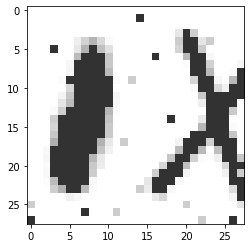

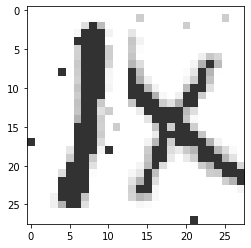

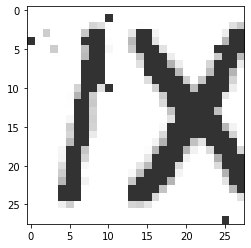

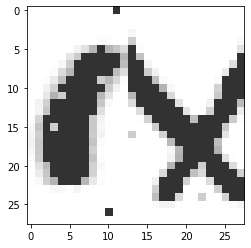

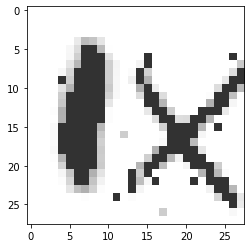

In [25]:
# Making capital 9s
i=0
j=0
n=0
while i<len(y_train):
    inc = random.randint(1, 5)
    if y_train[i]==18:
        n+=1
        img1 = reshape_and_rotate(X_train.iloc[i].values).astype('uint8')
        img1 = cv.bitwise_not(img1)
        rows,cols = img1.shape[:2]
        M = np.float32([[1,0,7],[0,1,0]])
        M_M = np.float32([[1,0,-7],[0,1,0]])
        while j<len(y_train):
            if y_train[j]==33:
                img2 = reshape_and_rotate(X_train.iloc[j].values).astype('uint8')
                img2 = cv.bitwise_not(img2)
                j+=inc
                break
            j+=inc

        dst = cv.warpAffine(img1,M_M,(cols,rows))
        dst_dst = cv.warpAffine(img2,M,(cols,rows))
        dst2 = cv.rectangle(dst_dst, (0,0), (12,28), (255), -1)
        dst_dst2 = cv.rectangle(dst, (20,0), (28,28), (255), -1)  
        dst3 = cv.addWeighted(dst_dst2, 0.5, dst2, 0.5, 0.0)        
        mask=cv.inRange(dst3,(0),(13))
        dst3[mask>0]=(0)
        noisy_image1 = cv.add(dst3,gaussian_noise(img1))
        noisy_image2 = cv.add(noisy_image1,uniform_noise(img1))
        noisy_image3 = cv.add(noisy_image2,impulse_noise(img1))
        dark_image = darkener(noisy_image3)
        noisy = add_noise(dark_image)
        cv.imwrite(os.path.join(output_folder, f'9_cap_{str(n)}.png'), noisy,  [cv.IMWRITE_PNG_COMPRESSION, 9])
        if n<6:
            plt.imshow(noisy)
            plt.show()
    if n==200:break
    i+=inc


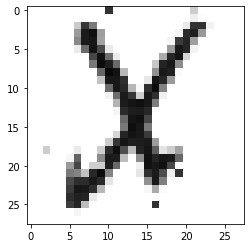

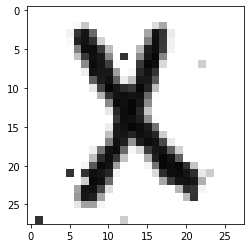

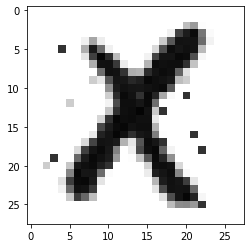

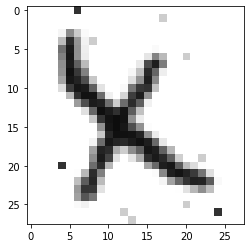

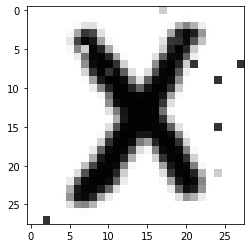

In [26]:
# Capital 10s
i=0
n=0
while i<len(y_train):
    inc = random.randint(1, 5)
    if y_train[i]==33:
        n+=1
        img = reshape_and_rotate(X_train.iloc[i].values).astype('uint8')
        img = cv.bitwise_not(img)
        noisy_image1 = cv.add(img,gaussian_noise(img))
        noisy_image2 = cv.add(noisy_image1,uniform_noise(img))
        noisy_image3 = cv.add(noisy_image2,impulse_noise(img))
        noisy = add_noise(noisy_image3)
        cv.imwrite(os.path.join(output_folder, f'10_cap_{str(n)}.png'), noisy,  [cv.IMWRITE_PNG_COMPRESSION, 9])
        if n<6:
            plt.imshow(noisy)
            plt.show()
    if n==500:break
    i+=inc

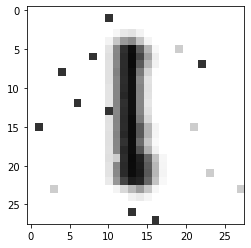

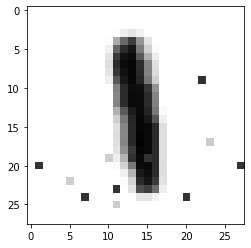

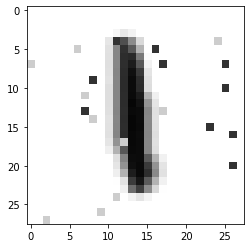

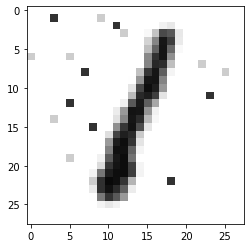

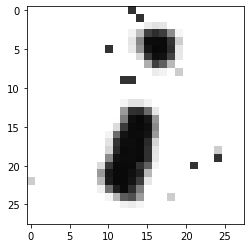

In [27]:
# Small 1s
i=0
n=0
while i<len(y_train):
    inc = random.randint(1, 5)
    if y_train[i]==44:
        n+=1
        img = reshape_and_rotate(X_train.iloc[i].values).astype('uint8')
        img = cv.bitwise_not(img)
        noisy_image1 = cv.add(img,gaussian_noise(img))
        noisy_image2 = cv.add(noisy_image1,uniform_noise(img))
        noisy_image3 = cv.add(noisy_image2,impulse_noise(img))
        noisy = add_noise(noisy_image3)
        cv.imwrite(os.path.join(output_folder, f'1_small_{str(n)}.png'), noisy,  [cv.IMWRITE_PNG_COMPRESSION, 9])
        if n<6:
            plt.imshow(noisy)
            plt.show()
    if n==500:break
    i+=inc

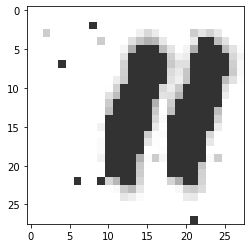

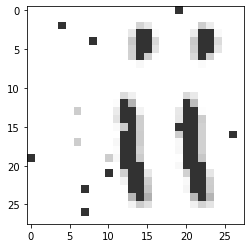

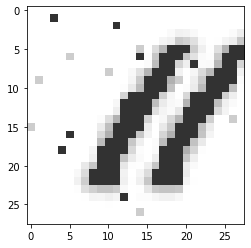

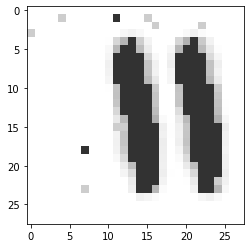

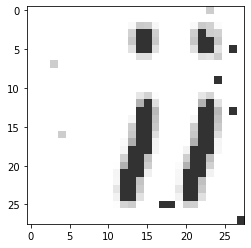

In [28]:
# Making small 2s
i=0
n=0
while i<len(y_train):
    inc = random.randint(1, 5)
    if y_train[i]==44:
        n+=1
        img = reshape_and_rotate(X_train.iloc[i].values).astype('uint8')
        img = cv.bitwise_not(img)
        rows,cols = img.shape[:2]
        M = np.float32([[1,0,8],[0,1,0]])
        dst = cv.warpAffine(img,M,(cols,rows))
        dst2 = cv.rectangle(dst, (0,0), (12,28), (255), -1)
        dst3 = cv.addWeighted(img, 0.5, dst2, 0.5, 0.0)
        mask=cv.inRange(dst3,(0),(13))
        dst3[mask>0]=(0)
        noisy_image1 = cv.add(dst3,gaussian_noise(img))
        noisy_image2 = cv.add(noisy_image1,uniform_noise(img))
        noisy_image3 = cv.add(noisy_image2,impulse_noise(img))
        dark_image = darkener(noisy_image3)
        noisy = add_noise(dark_image)
        cv.imwrite(os.path.join(output_folder, f'2_small_{str(n)}.png'), noisy,  [cv.IMWRITE_PNG_COMPRESSION, 9])
        if n<6:
            plt.imshow(noisy)
            plt.show()
    if n==500:break
    i+=inc


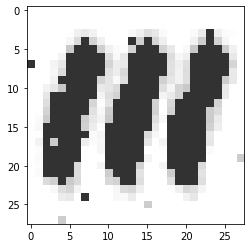

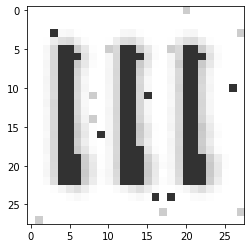

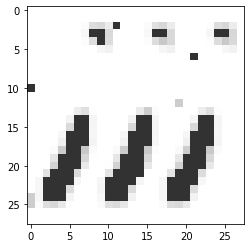

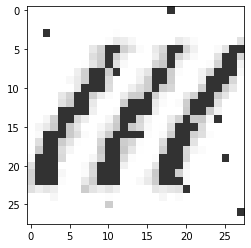

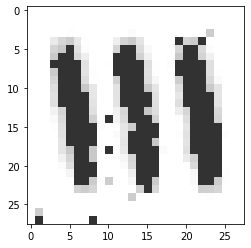

In [29]:
# Making small 3s
i=0
n=0
while i<len(y_train):
    inc = random.randint(1, 5)
    if y_train[i]==44:
        n+=1
        img = reshape_and_rotate(X_train.iloc[i].values).astype('uint8')
        img = cv.bitwise_not(img)
        rows,cols = img.shape[:2]
        M = np.float32([[1,0,8],[0,1,0]])
        M_M = np.float32([[1,0,-8],[0,1,0]])
        dst = cv.warpAffine(img,M,(cols,rows))
        dst_dst = cv.warpAffine(img,M_M,(cols,rows))
        dst2 = cv.rectangle(dst, (0,0), (12,28), (255), -1)
        dst_dst2 = cv.rectangle(dst_dst, (20,0), (28,28), (255), -1)  
        dst3 = cv.addWeighted(img, 0.5, dst2, 0.5, 0.0)
        dst_dst3 = cv.addWeighted(dst3, 0.67, dst_dst2, 0.33, 0.0)
        noisy_image1 = cv.add(dst_dst3,gaussian_noise(img))
        noisy_image2 = cv.add(noisy_image1,uniform_noise(img))
        noisy_image3 = cv.add(noisy_image2,impulse_noise(img))
        dark_image = darkener2(noisy_image3)
        noisy = add_noise(dark_image)
        cv.imwrite(os.path.join(output_folder, f'3_small_{str(n)}.png'), noisy,  [cv.IMWRITE_PNG_COMPRESSION, 9])
        if n<6:
            plt.imshow(noisy)
            plt.show()
    if n==500:break
    i+=inc


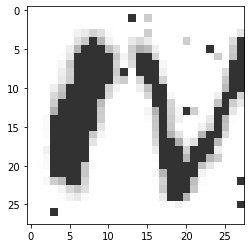

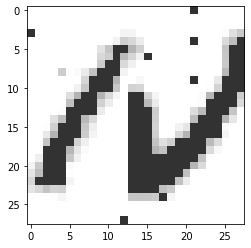

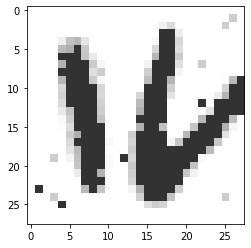

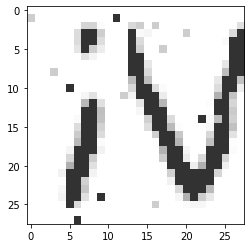

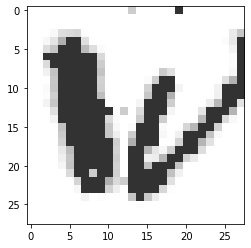

In [30]:
# Making small 4s
i=0
j=0
n=0
while i<len(y_train):
    inc = random.randint(1, 5)
    if y_train[i]==44:
        n+=1
        img1 = reshape_and_rotate(X_train.iloc[i].values).astype('uint8')
        img1 = cv.bitwise_not(img1)
        rows,cols = img1.shape[:2]
        M = np.float32([[1,0,7],[0,1,0]])
        M_M = np.float32([[1,0,-7],[0,1,0]])
        while j<len(y_train):
            if y_train[j]==57:
                img2 = reshape_and_rotate(X_train.iloc[j].values).astype('uint8')
                img2 = cv.bitwise_not(img2)
                j+=inc
                break
            j+=inc

        dst = cv.warpAffine(img1,M_M,(cols,rows))
        dst_dst = cv.warpAffine(img2,M,(cols,rows))
        dst2 = cv.rectangle(dst_dst, (0,0), (12,28), (255), -1)
        dst_dst2 = cv.rectangle(dst, (20,0), (28,28), (255), -1)  
        dst3 = cv.addWeighted(dst_dst2, 0.5, dst2, 0.5, 0.0)        
        mask=cv.inRange(dst3,(0),(13))
        dst3[mask>0]=(0)
        noisy_image1 = cv.add(dst3,gaussian_noise(img1))
        noisy_image2 = cv.add(noisy_image1,uniform_noise(img1))
        noisy_image3 = cv.add(noisy_image2,impulse_noise(img1))
        dark_image = darkener(noisy_image3)
        noisy = add_noise(dark_image)
        cv.imwrite(os.path.join(output_folder, f'4_small_{str(n)}.png'), noisy,  [cv.IMWRITE_PNG_COMPRESSION, 9])
        if n<6:
            plt.imshow(noisy)
            plt.show()
    if n==200:break
    i+=inc


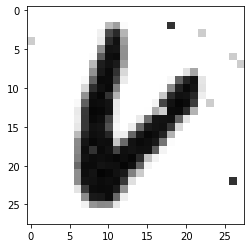

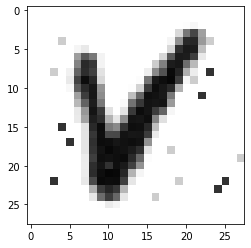

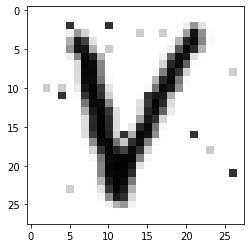

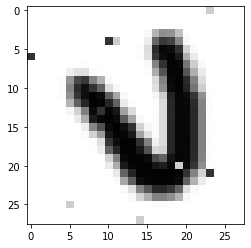

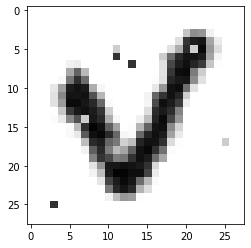

In [31]:
# Small 5s
i=0
n=0
while i<len(y_train):
    inc = random.randint(1, 5)
    if y_train[i]==57:
        n+=1
        img = reshape_and_rotate(X_train.iloc[i].values).astype('uint8')
        img = cv.bitwise_not(img)
        noisy_image1 = cv.add(img,gaussian_noise(img))
        noisy_image2 = cv.add(noisy_image1,uniform_noise(img))
        noisy_image3 = cv.add(noisy_image2,impulse_noise(img))
        noisy = add_noise(noisy_image3)
        cv.imwrite(os.path.join(output_folder, f'5_small_{str(n)}.png'), noisy,  [cv.IMWRITE_PNG_COMPRESSION, 9])
        if n<6:
            plt.imshow(noisy)
            plt.show()
    if n==500:break
    i+=inc

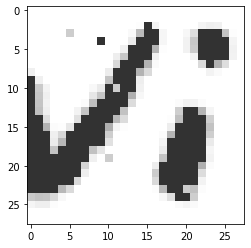

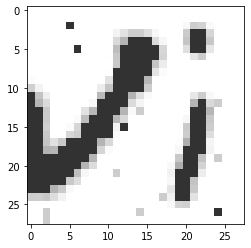

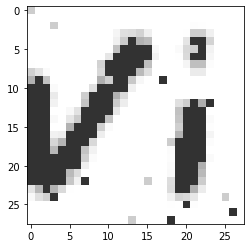

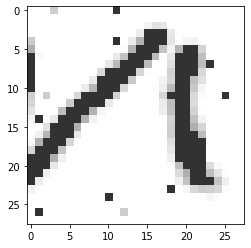

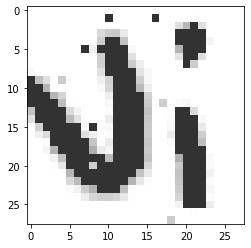

In [32]:
# Making capital 6s
i=0
j=0
n=0
while i<len(y_train):
    inc = random.randint(1, 5)
    if y_train[i]==57:
        n+=1
        img1 = reshape_and_rotate(X_train.iloc[i].values).astype('uint8')
        img1 = cv.bitwise_not(img1)
        rows,cols = img1.shape[:2]
        M = np.float32([[1,0,7],[0,1,0]])
        M_M = np.float32([[1,0,-7],[0,1,0]])
        while j<len(y_train):
            if y_train[j]==44:
                img2 = reshape_and_rotate(X_train.iloc[j].values).astype('uint8')
                img2 = cv.bitwise_not(img2)
                j+=inc
                break
            j+=inc

        dst = cv.warpAffine(img1,M_M,(cols,rows))
        dst_dst = cv.warpAffine(img2,M,(cols,rows))
        dst2 = cv.rectangle(dst_dst, (0,0), (12,28), (255), -1)
        dst_dst2 = cv.rectangle(dst, (20,0), (28,28), (255), -1)  
        dst3 = cv.addWeighted(dst_dst2, 0.5, dst2, 0.5, 0.0)        
        mask=cv.inRange(dst3,(0),(13))
        dst3[mask>0]=(0)
        noisy_image1 = cv.add(dst3,gaussian_noise(img1))
        noisy_image2 = cv.add(noisy_image1,uniform_noise(img1))
        noisy_image3 = cv.add(noisy_image2,impulse_noise(img1))
        dark_image = darkener(noisy_image3)
        noisy = add_noise(dark_image)
        cv.imwrite(os.path.join(output_folder, f'6_small_{str(n)}.png'), noisy,  [cv.IMWRITE_PNG_COMPRESSION, 9])
        if n<6:
            plt.imshow(noisy)
            plt.show()
    if n==500:break
    i+=inc


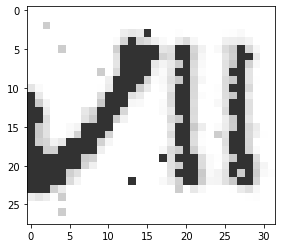

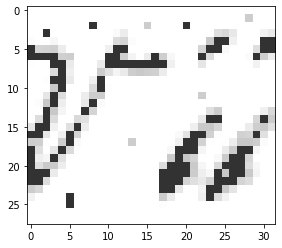

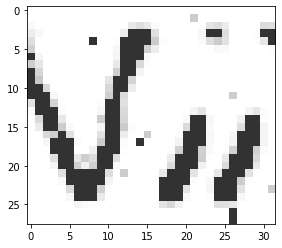

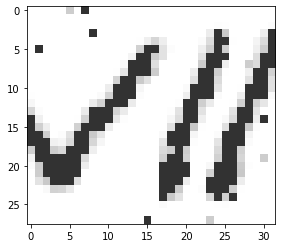

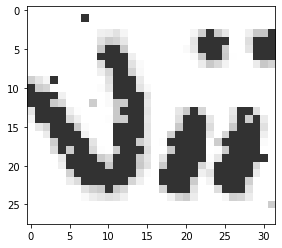

In [33]:
# Making small 7s
i=0
j=0
n=0
while i<len(y_train):
    inc = random.randint(1, 5)
    if y_train[i]==57:
        n+=1
        img1 = reshape_and_rotate(X_train.iloc[i].values).astype('uint8')
        img1 = cv.bitwise_not(img1)
        rows,cols = img1.shape[:2]
        exp = cols+4
        M = np.float32([[1,0,7],[0,1,0]])
        M_M = np.float32([[1,0,-7],[0,1,0]])
        M_M_M = np.float32([[1,0,14],[0,1,0]])
        while j<len(y_train):
            if y_train[j]==44:
                img2 = reshape_and_rotate(X_train.iloc[j].values).astype('uint8')
                img2 = cv.bitwise_not(img2)
                img3 = reshape_and_rotate(X_train.iloc[j].values).astype('uint8')
                img3 = cv.bitwise_not(img3)
                j+=inc
                break
            j+=inc

        dst = cv.warpAffine(img1,M_M,(exp,rows))
        dst_dst = cv.warpAffine(img2,M,(exp,rows))
        dst_dst_dst = cv.warpAffine(img3,M_M_M,(exp,rows))
        dst2 = cv.rectangle(dst_dst, (0,0), (16,32), (255), -1)
        dst_dst2 = cv.rectangle(dst, (20,0), (32,32), (255), -1)  
        dst_dst_dst2 = cv.rectangle(dst_dst_dst, (0,0), (16,32), (255), -1)  
        dst3 = cv.addWeighted(dst_dst2, 0.5, dst2, 0.5, 0.0)      
        mask=cv.inRange(dst3,(0),(13))
        dst3[mask>0]=(0)
        dst4 = cv.addWeighted(dst_dst_dst2, 0.33, dst3, 0.67, 0.0)      
        mask=cv.inRange(dst4,(0),(13))
        dst4[mask>0]=(0)
        noisy_image1 = cv.add(dst4,gaussian_noise(dst4))
        noisy_image2 = cv.add(noisy_image1,uniform_noise(dst4))
        noisy_image3 = cv.add(noisy_image2,impulse_noise(dst4))
        dark_image = darkener2(noisy_image3)
        noisy = add_noise(dark_image)
        cv.imwrite(os.path.join(output_folder, f'7_small_{str(n)}.png'), noisy,  [cv.IMWRITE_PNG_COMPRESSION, 9])
        if n<6:
            plt.imshow(noisy)
            plt.show()
    if n==500:break
    i+=inc


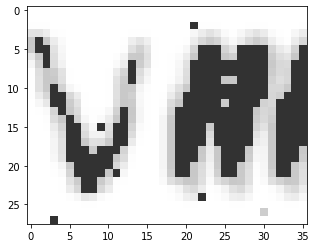

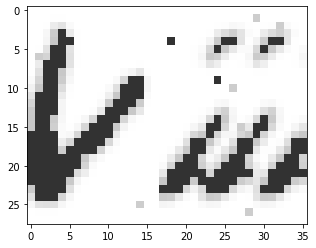

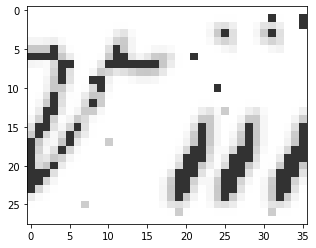

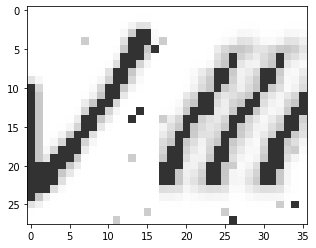

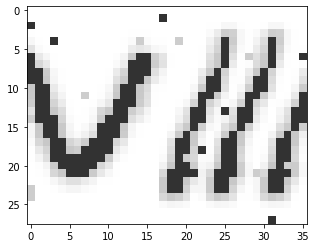

In [34]:
# Making small 8s
i=0
j=0
n=0
while i<len(y_train):
    inc = random.randint(1, 5)
    if y_train[i]==57:
        n+=1
        img1 = reshape_and_rotate(X_train.iloc[i].values).astype('uint8')
        img1 = cv.bitwise_not(img1)
        rows,cols = img1.shape[:2]
        exp = cols+8
        M = np.float32([[1,0,8],[0,1,0]])
        M_M = np.float32([[1,0,-7],[0,1,0]])
        M_M_M = np.float32([[1,0,14],[0,1,0]])
        M_4 = np.float32([[1,0,21],[0,1,0]])
        while j<len(y_train):
            if y_train[j]==44:
                img2 = reshape_and_rotate(X_train.iloc[j].values).astype('uint8')
                img2 = cv.bitwise_not(img2)
                img3 = reshape_and_rotate(X_train.iloc[j].values).astype('uint8')
                img3 = cv.bitwise_not(img3)
                img4 = reshape_and_rotate(X_train.iloc[j].values).astype('uint8')
                img4 = cv.bitwise_not(img4)
                j+=inc
                break
            j+=inc

        dst = cv.warpAffine(img1,M_M,(exp,rows))
        dst_dst = cv.warpAffine(img2,M,(exp,rows))
        dst_dst_dst = cv.warpAffine(img3,M_M_M,(exp,rows))
        dst_sqrd = cv.warpAffine(img3,M_4,(exp,rows))
        dst2 = cv.rectangle(dst_dst, (0,0), (16,36), (255), -1)
        dst_dst2 = cv.rectangle(dst, (20,0), (36,36), (255), -1)  
        dst_dst_dst2 = cv.rectangle(dst_dst_dst, (0,0), (16,36), (255), -1)  
        dst_sqrd_2 = cv.rectangle(dst_sqrd, (20,0), (0,36), (255), -1)  
        dst3 = cv.addWeighted(dst_dst2, 0.5, dst2, 0.5, 0.0)      
        mask=cv.inRange(dst3,(0),(13))
        dst3[mask>0]=(0)
        dst4 = cv.addWeighted(dst_dst_dst2, 0.33, dst3, 0.67, 0.0)      
        mask=cv.inRange(dst4,(0),(13))
        dst4[mask>0]=(0)
        dst5 = cv.addWeighted(dst_sqrd_2, 0.25, dst4, 0.75, 0.0)      
        mask=cv.inRange(dst5,(0),(13))
        dst5[mask>0]=(0)
        
        noisy_image1 = cv.add(dst5,gaussian_noise(dst5))
        noisy_image2 = cv.add(noisy_image1,uniform_noise(dst5))
        noisy_image3 = cv.add(dst5,impulse_noise(dst5))
        dark_image = darkener2(noisy_image3)
        noisy = add_noise(dark_image)
        cv.imwrite(os.path.join(output_folder, f'8_small_{str(n)}.png'), noisy,  [cv.IMWRITE_PNG_COMPRESSION, 9])
        if n<6:
            plt.imshow(noisy)
            plt.show()
    if n==500:break
    i+=inc


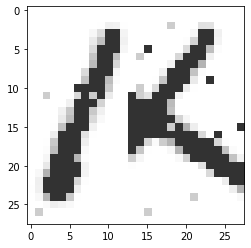

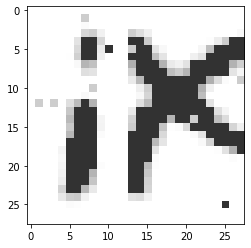

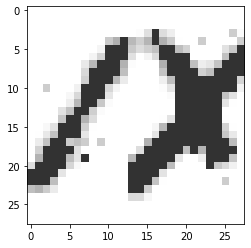

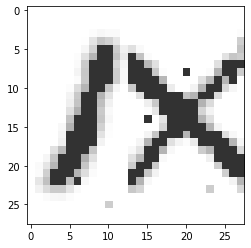

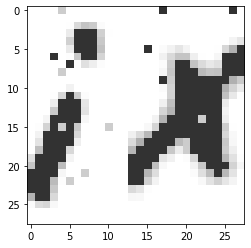

In [35]:
# Making small 9s
i=0
j=0
n=0
while i<len(y_train):
    inc = random.randint(1, 5)
    if y_train[i]==44:
        n+=1
        img1 = reshape_and_rotate(X_train.iloc[i].values).astype('uint8')
        img1 = cv.bitwise_not(img1)
        rows,cols = img1.shape[:2]
        M = np.float32([[1,0,7],[0,1,0]])
        M_M = np.float32([[1,0,-7],[0,1,0]])
        while j<len(y_train):
            if y_train[j]==59:
                img2 = reshape_and_rotate(X_train.iloc[j].values).astype('uint8')
                img2 = cv.bitwise_not(img2)
                j+=inc
                break
            j+=inc

        dst = cv.warpAffine(img1,M_M,(cols,rows))
        dst_dst = cv.warpAffine(img2,M,(cols,rows))
        dst2 = cv.rectangle(dst_dst, (0,0), (12,28), (255), -1)
        dst_dst2 = cv.rectangle(dst, (20,0), (28,28), (255), -1)  
        dst3 = cv.addWeighted(dst_dst2, 0.5, dst2, 0.5, 0.0)        
        mask=cv.inRange(dst3,(0),(13))
        dst3[mask>0]=(0)
        noisy_image1 = cv.add(dst3,gaussian_noise(img1))
        noisy_image2 = cv.add(noisy_image1,uniform_noise(img1))
        noisy_image3 = cv.add(noisy_image2,impulse_noise(img1))
        dark_image = darkener(noisy_image3)
        noisy = add_noise(dark_image)
        cv.imwrite(os.path.join(output_folder, f'9_small_{str(n)}.png'), noisy,  [cv.IMWRITE_PNG_COMPRESSION, 9])
        if n<6:
            plt.imshow(noisy)
            plt.show()
    if n==200:break
    i+=inc


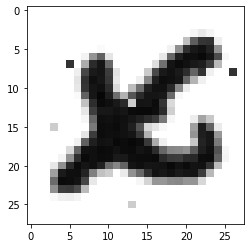

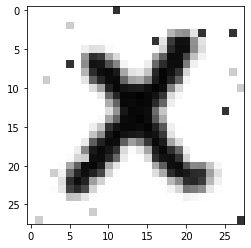

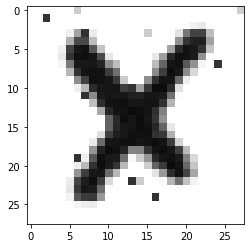

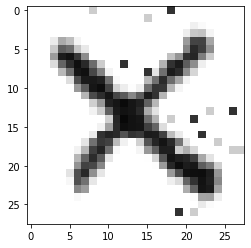

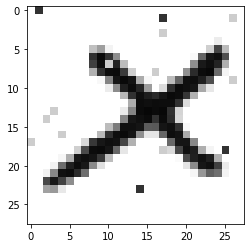

In [36]:
# Small 10s
i=0
n=0
while i<len(y_train):
    inc = random.randint(1, 5)
    if y_train[i]==59:
        n+=1
        img = reshape_and_rotate(X_train.iloc[i].values).astype('uint8')
        img = cv.bitwise_not(img)
        noisy_image1 = cv.add(img,gaussian_noise(img))
        noisy_image2 = cv.add(noisy_image1,uniform_noise(img))
        noisy_image3 = cv.add(noisy_image2,impulse_noise(img))
        noisy = add_noise(noisy_image3)
        cv.imwrite(os.path.join(output_folder, f'10_small_{str(n)}.png'), noisy,  [cv.IMWRITE_PNG_COMPRESSION, 9])
        if n<6:
            plt.imshow(noisy)
            plt.show()
    if n==500:break
    i+=inc

In [37]:
!zip -r output.zip /kaggle/working/output/

  adding: kaggle/working/output/ (stored 0%)
  adding: kaggle/working/output/2_small_279.png (stored 0%)
  adding: kaggle/working/output/1_cap_67.png (stored 0%)
  adding: kaggle/working/output/3_cap_471.png (stored 0%)
  adding: kaggle/working/output/1_small_98.png (stored 0%)
  adding: kaggle/working/output/5_small_427.png (stored 0%)
  adding: kaggle/working/output/10_cap_274.png (stored 0%)
  adding: kaggle/working/output/9_small_125.png (stored 0%)
  adding: kaggle/working/output/1_cap_355.png (stored 0%)
  adding: kaggle/working/output/8_cap_73.png (stored 0%)
  adding: kaggle/working/output/1_cap_415.png (stored 0%)
  adding: kaggle/working/output/6_cap_86.png (stored 0%)
  adding: kaggle/working/output/8_cap_95.png (stored 0%)
  adding: kaggle/working/output/10_small_165.png (stored 0%)
  adding: kaggle/working/output/1_small_280.png (stored 0%)
  adding: kaggle/working/output/10_small_106.png (stored 0%)
  adding: kaggle/working/output/7_cap_72.png (stored 0%)
  adding: kaggle